<a href="https://colab.research.google.com/github/Shraddhamane1/Shraddhamane1/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_shraddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**




Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

**Data Science Problem Statement**

---

Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.


# **GitHub Link -**

# ***Let's Begin !***

### Import Libraries

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

### Dataset Loading

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

# **DATA OVERVIEW**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## ***2. Understanding Your Variables***

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.shape

(185, 5)

# **DATA INFORMATION**


---
We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA AND Data Pre-Processing**

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

In [ ]:
#check if changes are being reflected
df1.head(1)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.0,14.0,11.25,12.46


## 3. ***Data Wrangling***

**CHECK AND HANDLE DUPLICATES**

In [ ]:
#check duplicate entries

len(df1[df1.duplicated()])

0

No duplicate data found.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**UNIVARIATE ANALYSIS**
---
We will take a look at distribution plots of our features.


INDEPENDENT VARIABLES



<ipython-input-31-80babbbfefdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df1[var].dropna())
<ipython-input-31-80babbbfefdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df1[var].dropna())
<ipython-input-31-80babbbfefdf>:5: UserWarning: 

`distplot` is a deprecated functio

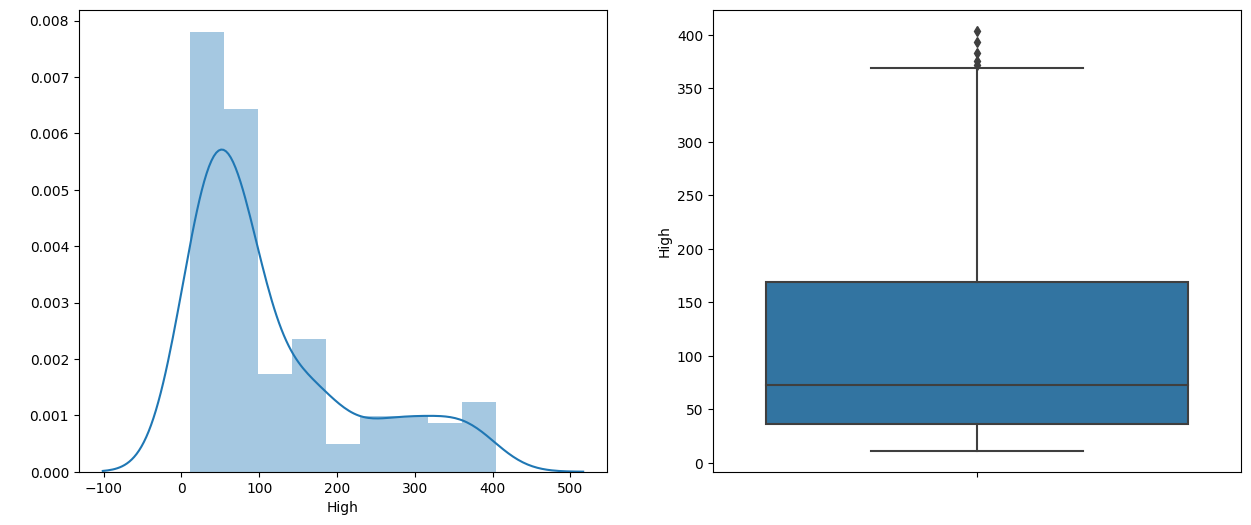

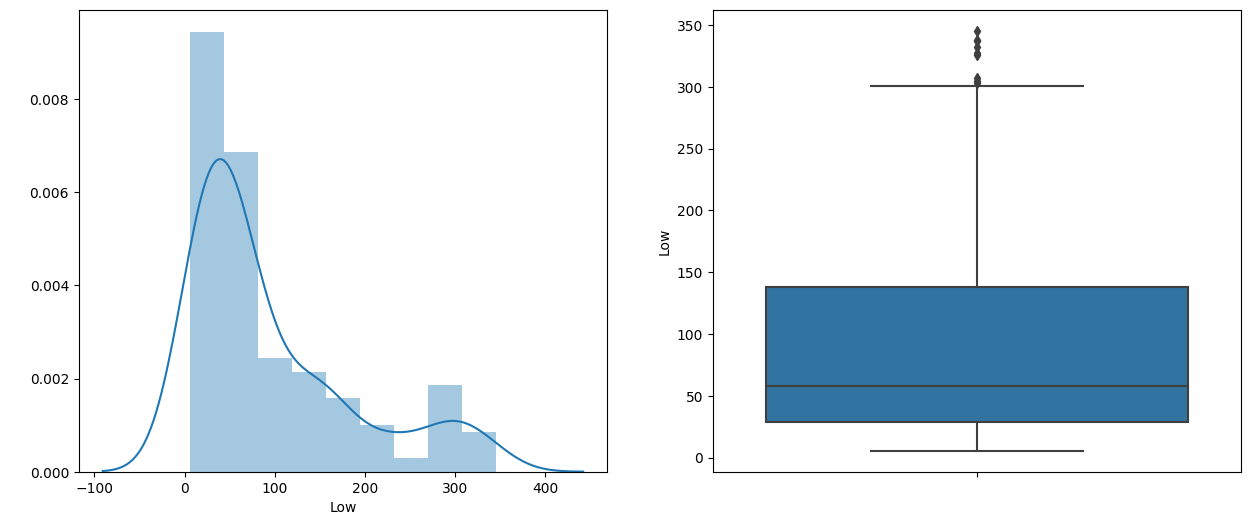

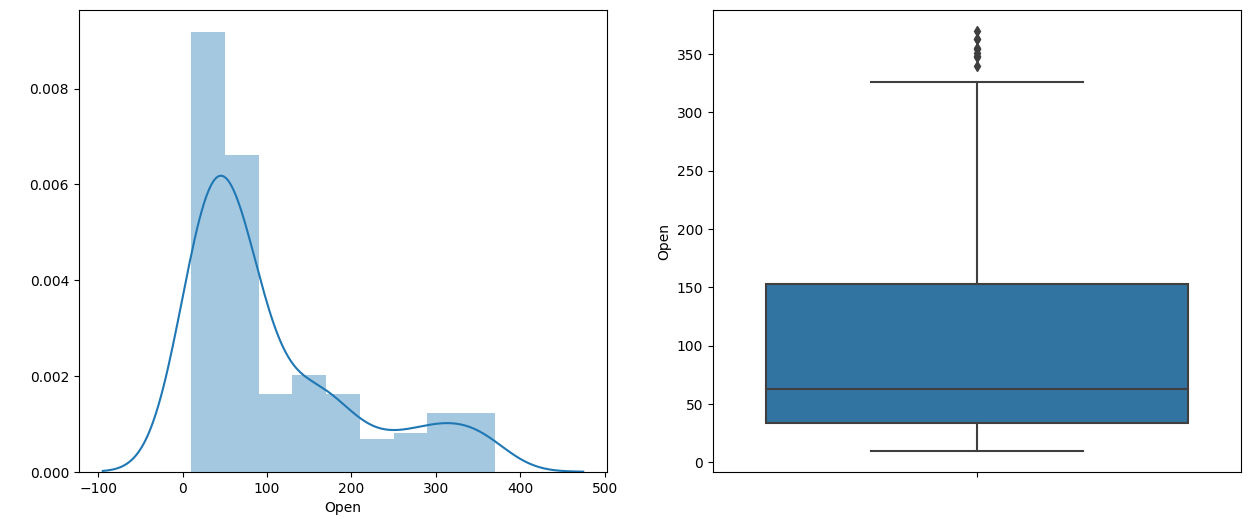

In [ ]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)


##### 1. Why did you pick the specific chart?

DEPENDENT VARIABLE

<ipython-input-32-5f2f619454b9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df1['Close'].dropna())


Text(0, 0.5, 'Open')

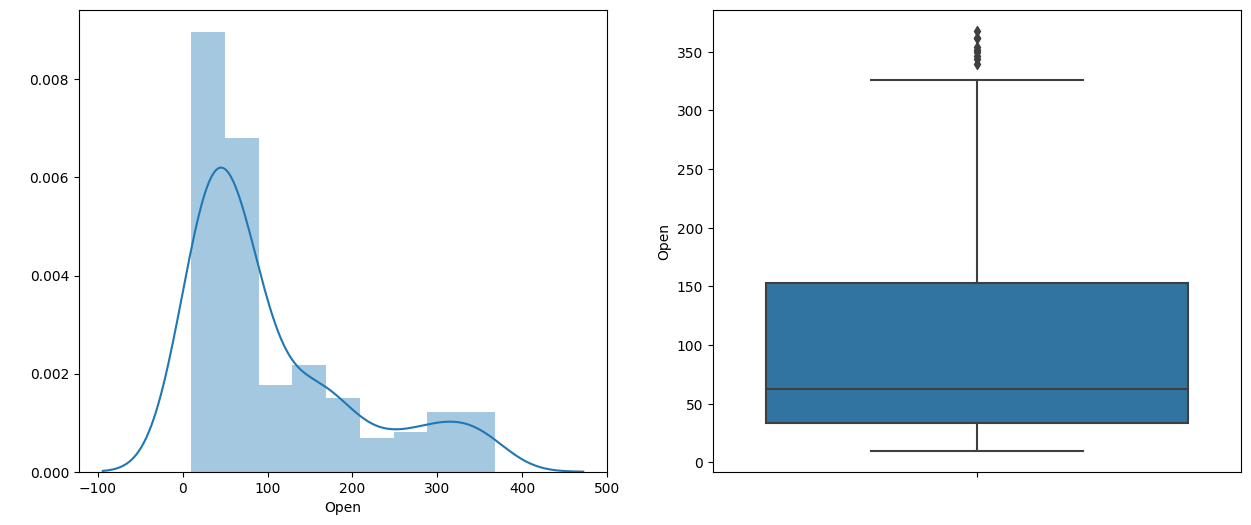

In [ ]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)

DATA TRANSFORMATION

---
Since our data is skewed, we will perform some transformations during regression analysis. Let's visualize how our data will look like post transformation.


<ipython-input-33-943d77069d98>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(df1[var]))
<ipython-input-33-943d77069d98>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(np.log10(df1[var]))
<ipython-input-33-943d77069d98>:5: UserWarning: 

`distplot` is a deprecated funct

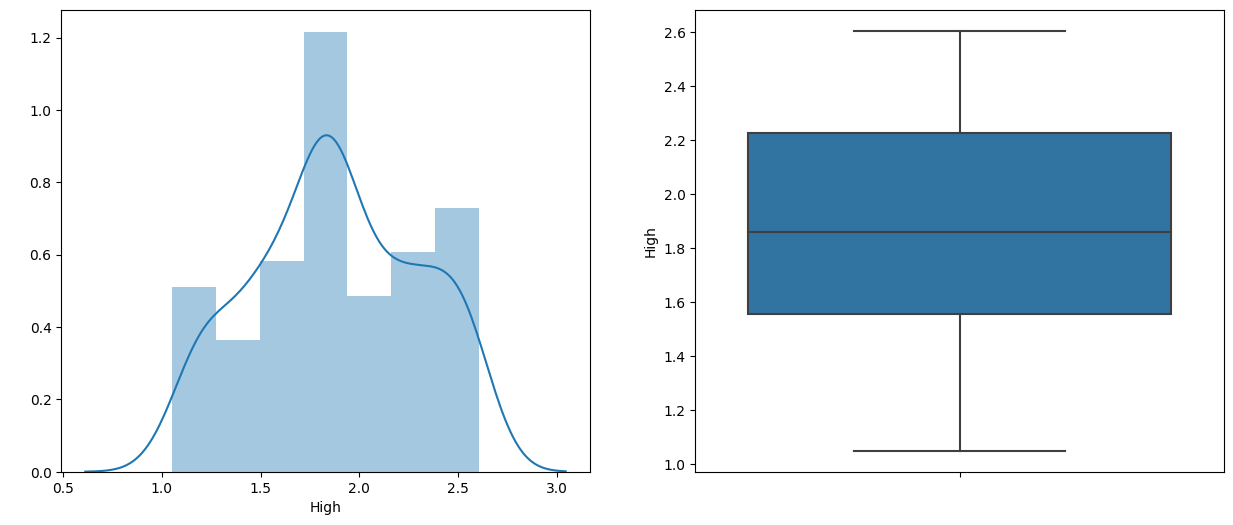

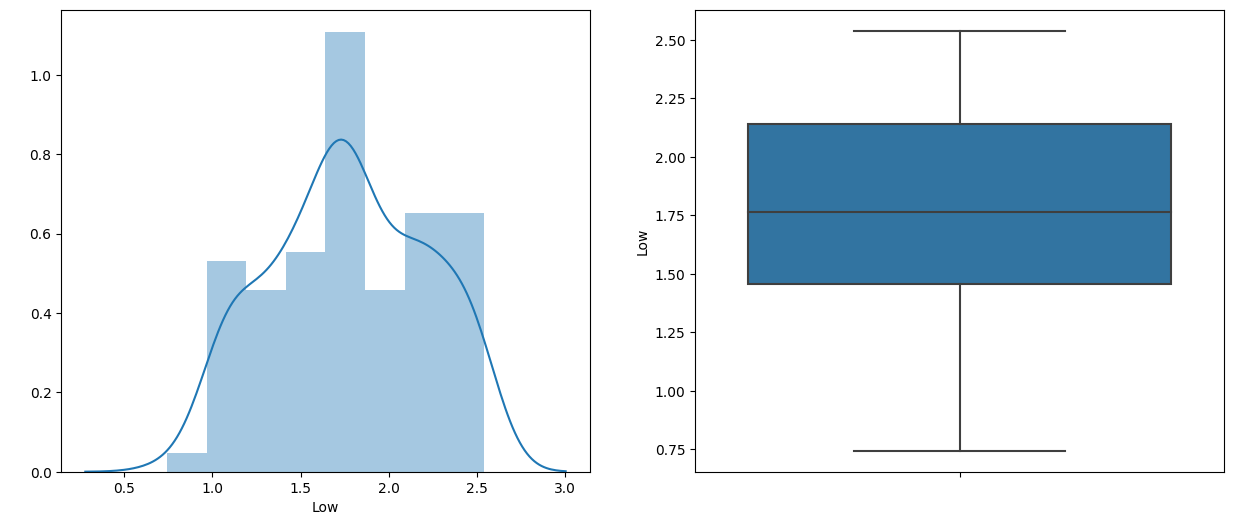

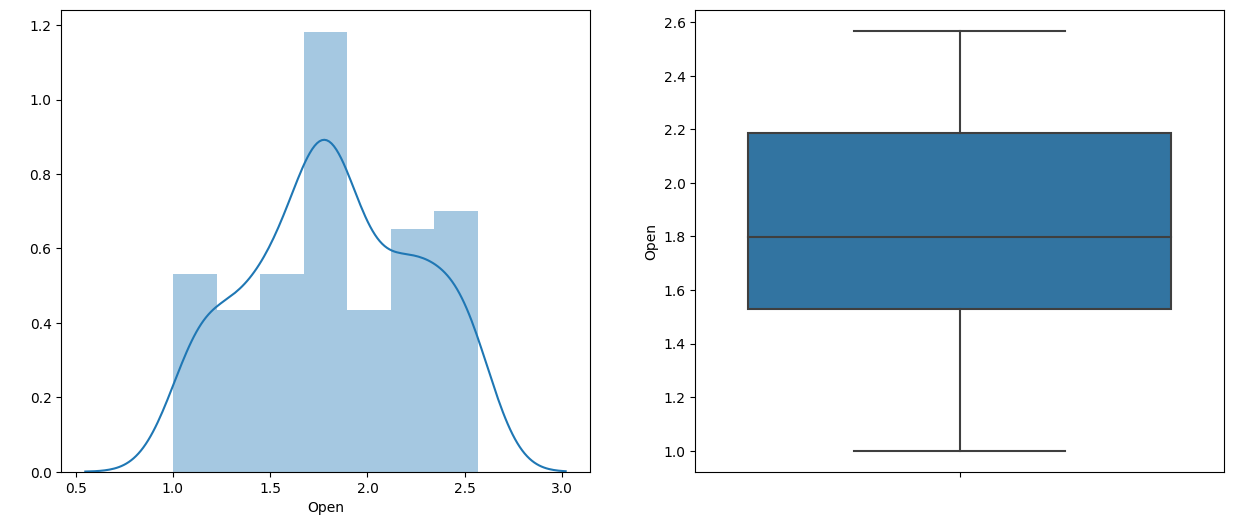

In [ ]:
#independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

Scatter plots are effective for visualizing the relationship between two continuous variables, making them suitable for exploring the association between independent variables and the dependent variable.
The use of scatter plots with a regression line (in your code) helps in understanding the trend or pattern in the data and provides insights into the strength and direction of the relationship.


2. What is/are the insight(s) found from the chart?

**Positive/Negative Correlation**: The slope of the regression line and the correlation coefficient can indicate whether there is a positive or negative correlation between the independent variable and the dependent variable.

**Outliers**: Scatter plots can reveal the presence of outliers, which may have a significant impact on the relationship.


**Patterns/Trends**: Examining the scatter plot might reveal any non-linear patterns or trends in the data.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Informed Decision-Making:** Understanding the relationship between variables allows for informed decision-making. For example, if there is a strong positive correlation between an independent variable and the closing price, it can be used for forecasting and strategic decision-making.

**Optimization:** Insights from the scatter plots can help optimize business processes, marketing strategies, or resource allocation based on identified patterns.


**Negative Growth Insights:**

**Weak Correlation:** If scatter plots show a weak correlation or no clear pattern, it may indicate that the variable does not significantly influence the closing price. This could lead to less effective decision-making if the variable was initially thought to be crucial.


Now our data mimics normal distribution to an extent.

## 2. **BIVARIATE ANALYSIS**

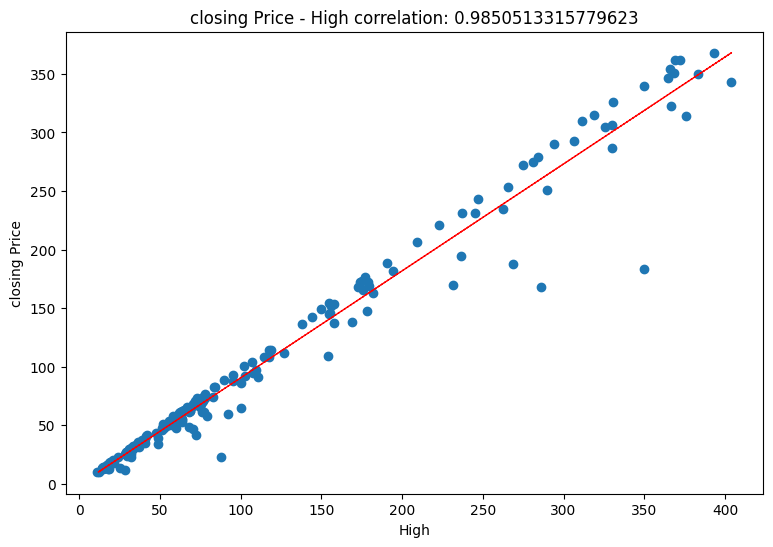

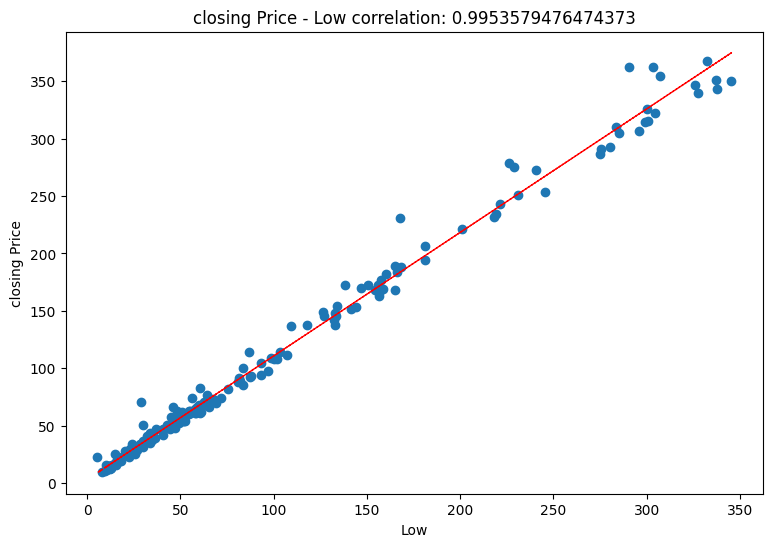

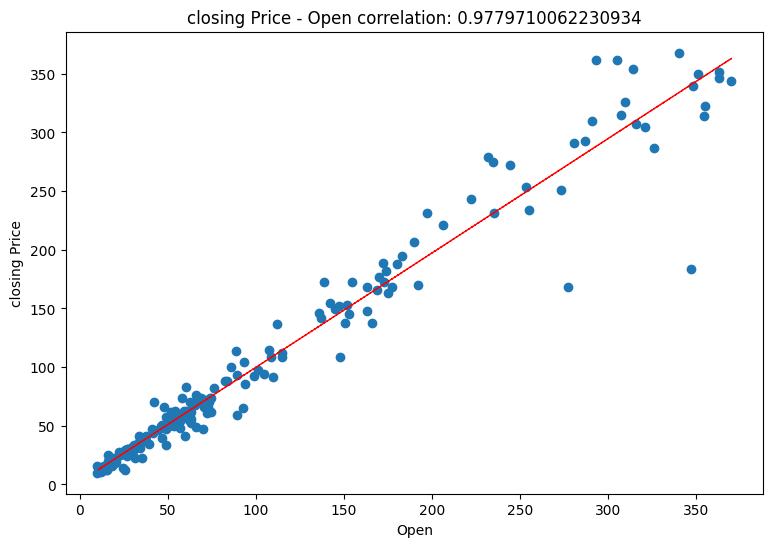

In [ ]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])

   plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

##### 3. Will the gained insights help creating a positive business impact?
 Are there any insights that lead to negative growth? Justify with specific reason.

We can clearly make out that all the independent variables are linearly affecting our dependent variable.

**POSITIVE BUSINESS IMPACT**

**Informed Decision-Making:**

Understanding the relationship between various independent variables and the closing price of a stock can guide investment strategies. For instance, if a strong positive correlation is identified with certain variables, it may prompt investors to monitor these variables closely for predicting stock movements.

**Risk Management:**

Identifying variables negatively correlated with the closing price can be crucial for risk management. If certain factors consistently lead to a decrease in stock value, investors or financial analysts might use this information to mitigate risk.

**NEGATIVE BUSINESS IMPACT**

**Overreliance on Correlation:**

Correlation does not imply causation. Decisions based solely on these correlations without understanding underlying causes might lead to poor investment choices.


**Misinterpretation of Data:**

Incorrect interpretation of trends or outliers could lead to misguided strategies. For instance, assuming a non-linear relationship is linear could result in inaccurate predictions.



3. **CORRELATION**

Now, we will see the correlation between all the features in our data set.

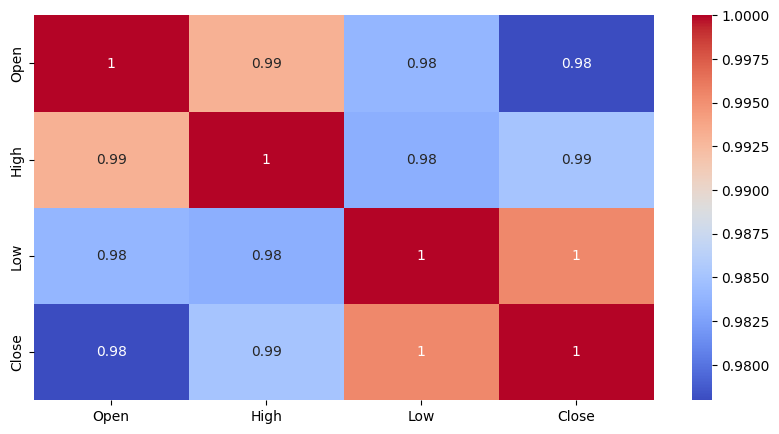

In [ ]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

1. Why did you pick the specific chart?

 Correlation Heatmap:

  The correlation heatmap was chosen to provide a comprehensive visual representation of the pairwise correlations between different variables in the dataset.

  Heatmaps are effective for quickly identifying patterns and relationships in large datasets, especially when dealing with numerical variables.



2. What is/are the insight(s) found from the chart?


**Potential Insights from a Correlation Heatmap:**

**Strength and Direction of Correlations:**

Positive correlations are represented by higher values (closer to 1), indicating that as one variable increases, the other tends to increase as well. Negative correlations are shown by lower values (closer to -1), suggesting that as one variable increases, the other tends to decrease.

**Identifying Strong Correlations:**

High absolute values in the heatmap indicate strong correlations. This can be crucial for understanding which variables have a significant impact on each other.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Informed Decision-Making:**

Understanding the correlations can inform decision-making processes. For example, if certain variables have a strong positive correlation with closing prices, businesses or investors may leverage this knowledge for strategic decision-making.

**Feature Selection:**

Identifying highly correlated independent variables allows for more effective feature selection in predictive modeling, improving the accuracy of models.

**Potential Negative Impact Considerations:**


**Misinterpretation of Correlation:**

Correlation does not imply causation. While high correlation between variables is informative, assuming a causal relationship based solely on correlation can lead to misguided strategies.

**Ignoring Non-linear Relationships:**

Correlation heatmaps primarily capture linear relationships. Non-linear relationships might exist and not be adequately represented in the heatmap. Ignoring non-linearities can lead to incomplete insights.


4. **MULTICOLLINEARITY**

In [ ]:
#Multicollinearity
#VIF score

def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.


NOTE - I tried to run an analysis  by converting high and low into day range and my error increased by 3x-4x, which further proved all data points here are necessary.


**DATAFRAME TO STORE EVALUATION METRICS**

I will store the evaluation metrics for each regression model into this data frame to compare at the end.

In [ ]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

# **LINEAR REGRESSION**

From this point on we will run different Regression models with the same data.

---

Let's start with Linear Regression.

In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

In [ ]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Fitting Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [ ]:
#predictions
y_pred = reg.predict(x_test)

**EVALUATION**

In [ ]:
#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.052764712964646
MSE : 19.988578593595022
RMSE : 4.470858820584142
MAPE : 5.404201340281821


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i+=1

**VISUALIZATION**

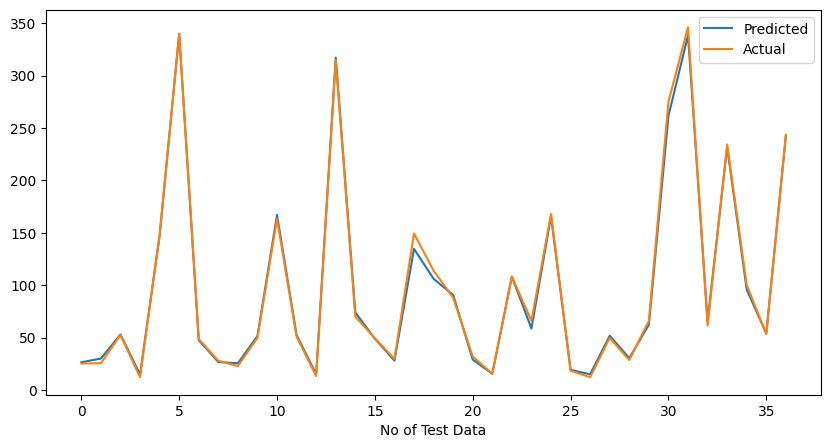

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

 1. Why did you pick the specific chart?

This chart is chosen because it visually compares the predicted values (from your model) against the actual values in the test data. Such a comparison is critical for evaluating the performance of predictive models, especially in contexts like financial forecasting where accuracy is paramount.



What is/are the insight(s) found from the chart?

**Model Performance:**

By plotting both the predicted and actual values, you can immediately assess how well the model is performing. If the two lines closely follow each other, it indicates good model accuracy.

**Trend Identification:**

This plot can reveal if your model is capable of capturing the overall trend in the data. If your model is consistently above or below the actual values, this might indicate a systematic bias.

Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

**Improved Decision Making:**

If the model shows high accuracy, it can be used to inform financial decisions, such as stock trading or resource allocation.
Risk Management: By understanding the model's performance, especially in volatile periods, strategies can be developed to mitigate risks.
Potential Negative Impacts:

**Overreliance on Model:**

If the model is not accurate but is still used for decision-making, it could lead to poor business decisions.
Misinterpreting the Model: Misreading the model's accuracy or its applicability in different market conditions could lead to misguided strategies.
Market Volatility: The model might not perform well under unexpected market conditions, which could lead to losses if not accounted for.

# **LASSO REGRESSION**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(x_train, y_train)

0.9943947120445369

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 1.203e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+03, tolerance: 1.205e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e+03, tolerance: 1.203e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.900491725606194


In [ ]:
#prediction
y_pred = lasso_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.1308568938605057
MSE : 20.878651216190214
RMSE : 4.569316274475889
MAPE : 5.53404458516646


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)


i=i+1

**VISUALIZATION**

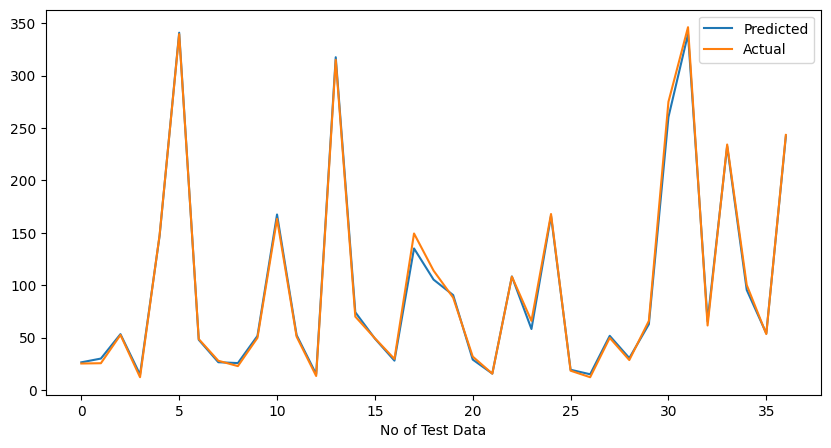

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

1. Why did you pick the specific chart?

The specific chart comparing predicted values with actual values is crucial in the context of financial modeling and forecasting. It visually represents how well the model is performing by showing how close the predictions are to the real-world data. This is especially important in stock price prediction, where accuracy has direct financial implications.



What is/are the insight(s) found from the chart?

**Model Performance:**

 The degree of congruence between the predicted and actual lines indicates the accuracy of your predictive model. A closer alignment means higher accuracy.


**Trend Analysis:**

If the model consistently captures the trend of the actual data, it suggests a good understanding of underlying factors affecting stock prices.


**Positive Impact:**

Accurate predictions can lead to better decision-making in investments, risk management, and financial planning. It can help in identifying profitable opportunities and in avoiding potential losses.


**Potential for Negative Growth:** If the model consistently fails to predict accurately (evidenced by a significant divergence between predicted and actual values), this could lead to misguided investment strategies and financial losses. Over-reliance on a flawed model can be detrimental.


# **RIDGE REGRESSION**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(x_train, y_train)

0.9920836705746654

In [ ]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.333737891185


In [ ]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.061022460686161
MSE : 20.095425485603723
RMSE : 4.482792152844444
MAPE : 5.41673710982311


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

**VISUALIZATION**

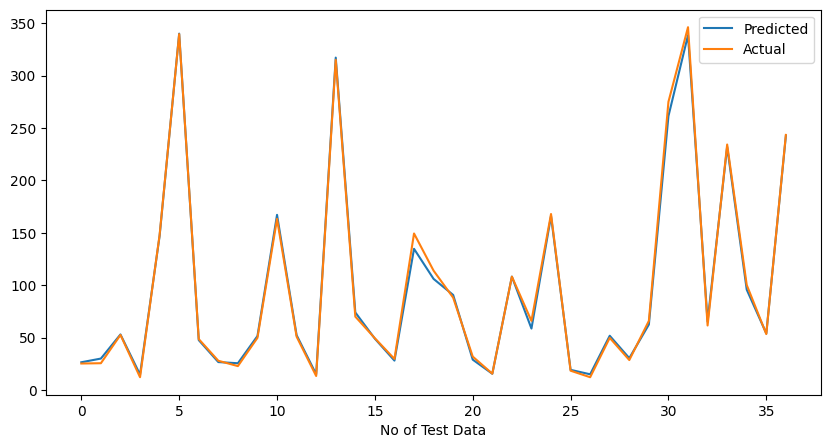

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **KNN**

In [ ]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fitting data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 4.104324324324326
MSE : 37.72864864864864
RMSE : 6.142365069633084
MAPE : 6.4409728288406365


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

**VISUALIZATION**

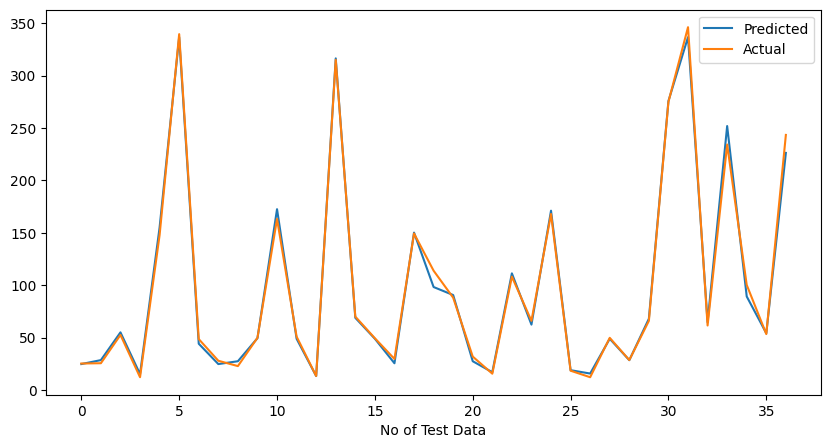

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **XGBOOST REGRESSOR**

Since Xgboost is a black box technique and has a lot of inbuilt functions, we will put untransformed data through it.

I tried running the data with manual inputs but XGB gave the best results with no human intervention, I guess the machine is already smarter than me :p

In [ ]:
#data split
x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [ ]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#prediction
y_pred = xgb.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 4.8824753426216745
MSE : 47.43254866759902
RMSE : 6.8871292036376826
MAPE : 7.57714484616943


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='XGBoost regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

**VISUALIZATION**

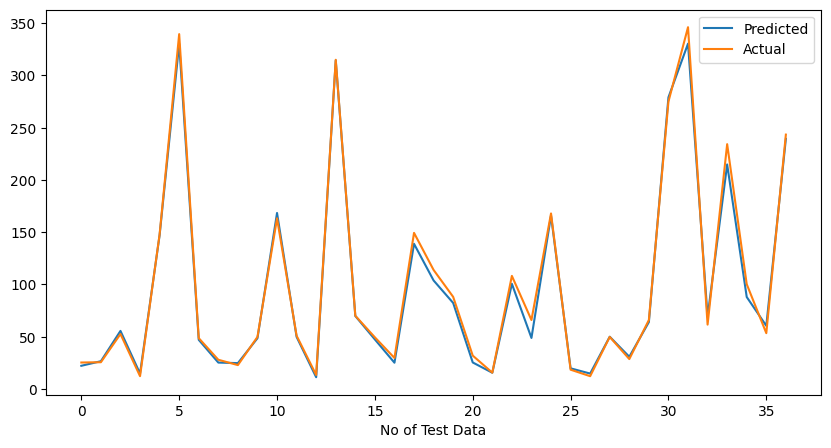

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **METRICS COMPARISION**

We will now compare performance of all the regression models-

In [ ]:
#sorting metrics
error_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [ ]:
error_df

,Model_Name,MAE,MSE,RMSE,MAPE
0,Linear regression,3.05,19.99,4.47,5.40
2,Ridge regression,3.06,20.10,4.48,5.42
1,Lasso regression,3.13,20.88,4.57,5.53
3,KNN regressor,4.10,37.73,6.14,6.44
4,XGBoost regressor,4.88,47.43,6.89,7.58


# **Conclusion**

---
1. The target variable is highly dependent on input variables.
2. Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.
3. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up affecting the evaluation metrics.
4. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
5. The accuracy for each model is more than 90%.
6. KNN AND XGBoost have given similar results.